In [21]:
import pandas as pd
import numpy as np
path = r'C:\Users\VillardX\Desktop\law2019\预处理数据\whole1.0.xlsx'
data = pd.read_excel(path)

In [2]:
data.columns

Index(['庭审程序_是否_刑罚变更', '庭审程序_是否_一审', '庭审程序_是否_二审', '庭审程序_是否_复核', '庭审程序_是否_其他',
       '机动车交通事故责任纠纷', '物件损害责任纠纷', '侵权责任纠纷', '产品责任纠纷', '提供劳务者受害责任纠纷',
       '医疗损害责任纠纷', '地面施工、地下设施损害责任纠纷', '饲养动物损害责任纠纷', '产品销售者责任纠纷',
       '因申请诉中财产保全损害责任纠纷', '教育机构责任纠纷', '违反安全保障义务责任纠纷', '网络侵权责任纠纷',
       '因申请诉前财产保全损害责任纠纷', '物件脱落、坠落损害责任纠纷', '因申请诉中证据保全损害责任纠纷',
       '建筑物、构筑物倒塌损害责任纠纷', '提供劳务者致害责任纠纷', '产品生产者责任纠纷', '公共场所管理人责任纠纷',
       '公证损害责任纠纷', '用人单位责任纠纷', '触电人身损害责任纠纷', '义务帮工人受害责任纠纷', '高度危险活动损害责任纠纷',
       '噪声污染责任纠纷', '堆放物倒塌致害责任纠纷', '公共道路妨碍通行损害责任纠纷', '见义勇为人受害责任纠纷', '医疗产品责任纠纷',
       '监护人责任纠纷', '水上运输人身损害责任纠纷', '环境污染责任纠纷', '因申请先予执行损害责任纠纷', '铁路运输人身损害责任纠纷',
       '水污染责任纠纷', '林木折断损害责任纠纷', '侵害患者知情同意权责任纠纷', '群众性活动组织者责任纠纷', '土壤污染责任纠纷',
       '文书类型_是否_判决书', '文书类型_是否_裁定书', '第三人_有无自然人', '原告_是否_检察院', '原告_是否_法人',
       '原告_是否_自然人', '原告_是否_其他', '被告_是否_自然人', '被告_是否_法人', '被告_是否_其他',
       '庭审过程_是否撤诉_是', '庭审过程_是否撤诉_否', '庭审过程_是否撤诉_未知', '庭审过程_是否撤诉_汇总',
       '庭审过程_是否受伤_是', '庭审过程_是否受伤_否', '庭审过程_是否受伤_未知', '庭审过程_是否受伤_汇总

In [22]:
del data['庭审过程_是否拒不到庭_汇总']
del data['庭审过程_是否有异议_汇总']
del data['庭审过程_是否撤诉_汇总']
del data['庭审过程_是否受伤_汇总']
del data['庭审过程_是否涉及金钱_汇总']
del data['庭审过程_是否故意_汇总']
del data['庭审过程_是否要求精神赔偿_汇总']

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.ix[:,:-1], data.ix[:,-1], test_size=0.2, random_state=1)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [29]:
from sklearn.ensemble import RandomForestClassifier

class_weight = dict({1:0.9, 0:0.1})
clf = RandomForestClassifier(n_estimators = 10,max_depth = 10,class_weight=class_weight,min_samples_split = 10)
#clf = RandomForestClassifier()
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight={1: 0.9, 0: 0.1},
            criterion='gini', max_depth=10, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [30]:
clf.score(X_test,y_test)

0.966776845495381

In [26]:
#随机森林可视化
from sklearn.externals.six import StringIO
from sklearn.ensemble import RandomForestClassifier
from IPython.display import Image
from sklearn import tree
import pydotplus


feature_name=list(X_train.columns)
target_name = [u'非终审',u'终审']
Estimators = clf.estimators_

for index, model in enumerate(Estimators):
    dot_data = StringIO()
    filename = 'rf_tree_' + str(index+1) + '.svg'#该格式可以显示中文
    tree.export_graphviz(model , out_file=dot_data,
                         feature_names=feature_name,
                         class_names=target_name,
                         filled=True, rounded=True,
                         special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    graph.write_svg(filename)#改为svg输出


In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, labels=None, target_names=None, sample_weight=None, digits=2))

             precision    recall  f1-score   support

          0       1.00      0.96      0.98     10509
          1       0.77      0.97      0.86      1290

avg / total       0.97      0.96      0.97     11799



[0, 1, 2]
[[10136   373]
 [   45  1245]]
[[10136   373]
 [   45  1245]]
[10509  1290]
[[0.96450661 0.03549339]
 [0.03488372 0.96511628]]
[[0.965 0.035]
 [0.035 0.965]]


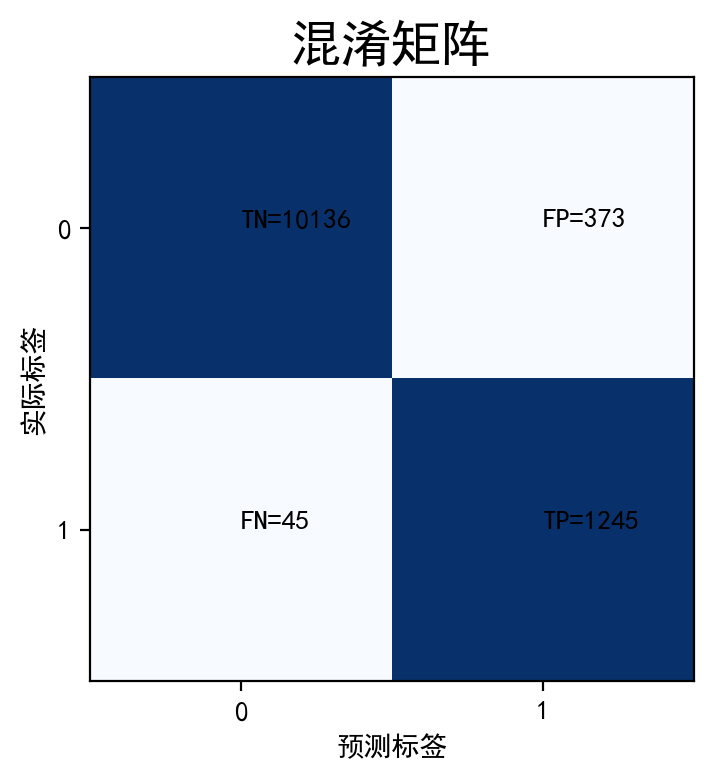

In [56]:
#混淆矩阵
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt

cfm=confusion_matrix(y_test,y_pred)
real=list(set(real))
real.sort()#自动升序排序
print(real)
print(cfm)#



confusion=cfm
print(confusion)

row_nums=np.sum(confusion,axis=1)
print(row_nums)
error_matrix=np.zeros(confusion.shape)#创建错误率矩阵
for x in range(len(error_matrix)):
    for y in range(len(error_matrix)):
        error_matrix[x][y]=confusion[x][y]/row_nums[x]
print(error_matrix)

for x in range(len(error_matrix)):##保留两位小数
    for y in range(len(error_matrix)):
        error_matrix[x][y]=round(error_matrix[x][y],3)
print(error_matrix)
#np.fill_diagonal(error_matrix,0)#将主对角线的值填充为0
#print(error_matrix)


plt.figure(dpi=200)
plt.imshow(error_matrix, cmap=plt.cm.Blues)
# ticks 这个是坐标轴上的坐标点
# label 这个是坐标轴的注释说明
indices = range(len(error_matrix))

classes=real

# 坐标位置放入
# 第一个是迭代对象，表示坐标的顺序
# 第二个是坐标显示的数值的数组，第一个表示的其实就是坐标显示数字数组的index，但是记住必须是迭代对象
plt.xticks(indices, classes)
plt.yticks(indices, classes)
# 热度显示仪？就是旁边的那个验孕棒啦
#plt.colorbar()
# 就是坐标轴含义说明了
plt.xlabel(u'预测标签')
plt.ylabel(u'实际标签')
plt.title(u'混淆矩阵',fontsize=18)
# 显示数据，直观些
plt.text(0, 0, 'TN='+str(confusion[0][0]))
plt.text(0, 1, 'FN='+str(confusion[1][0]))
plt.text(1, 0, 'FP='+str(confusion[0][1]))
plt.text(1, 1, 'TP='+str(confusion[1][1]))

#显示
plt.show()

 1) 庭审程序_是否_刑罚变更                   0.221675
 2) 庭审程序_是否_一审                     0.108111
 3) 庭审程序_是否_二审                     0.083073
 4) 庭审程序_是否_复核                     0.081579
 5) 庭审程序_是否_其他                     0.077511
 6) 机动车交通事故责任纠纷                    0.058535
 7) 物件损害责任纠纷                       0.048973
 8) 侵权责任纠纷                         0.041522
 9) 产品责任纠纷                         0.038873
10) 提供劳务者受害责任纠纷                    0.037160
11) 医疗损害责任纠纷                       0.033980
12) 地面施工、地下设施损害责任纠纷                0.028404
13) 饲养动物损害责任纠纷                     0.023988
14) 产品销售者责任纠纷                      0.021949
15) 因申请诉中财产保全损害责任纠纷                0.014579
16) 教育机构责任纠纷                       0.013117
17) 违反安全保障义务责任纠纷                   0.011751
18) 网络侵权责任纠纷                       0.007735
19) 因申请诉前财产保全损害责任纠纷                0.006165
20) 物件脱落、坠落损害责任纠纷                  0.005933
21) 因申请诉中证据保全损害责任纠纷                0.004865
22) 建筑物、构筑物倒塌损害责任纠纷                0.004620
23) 提供劳务者致害责任纠纷                 

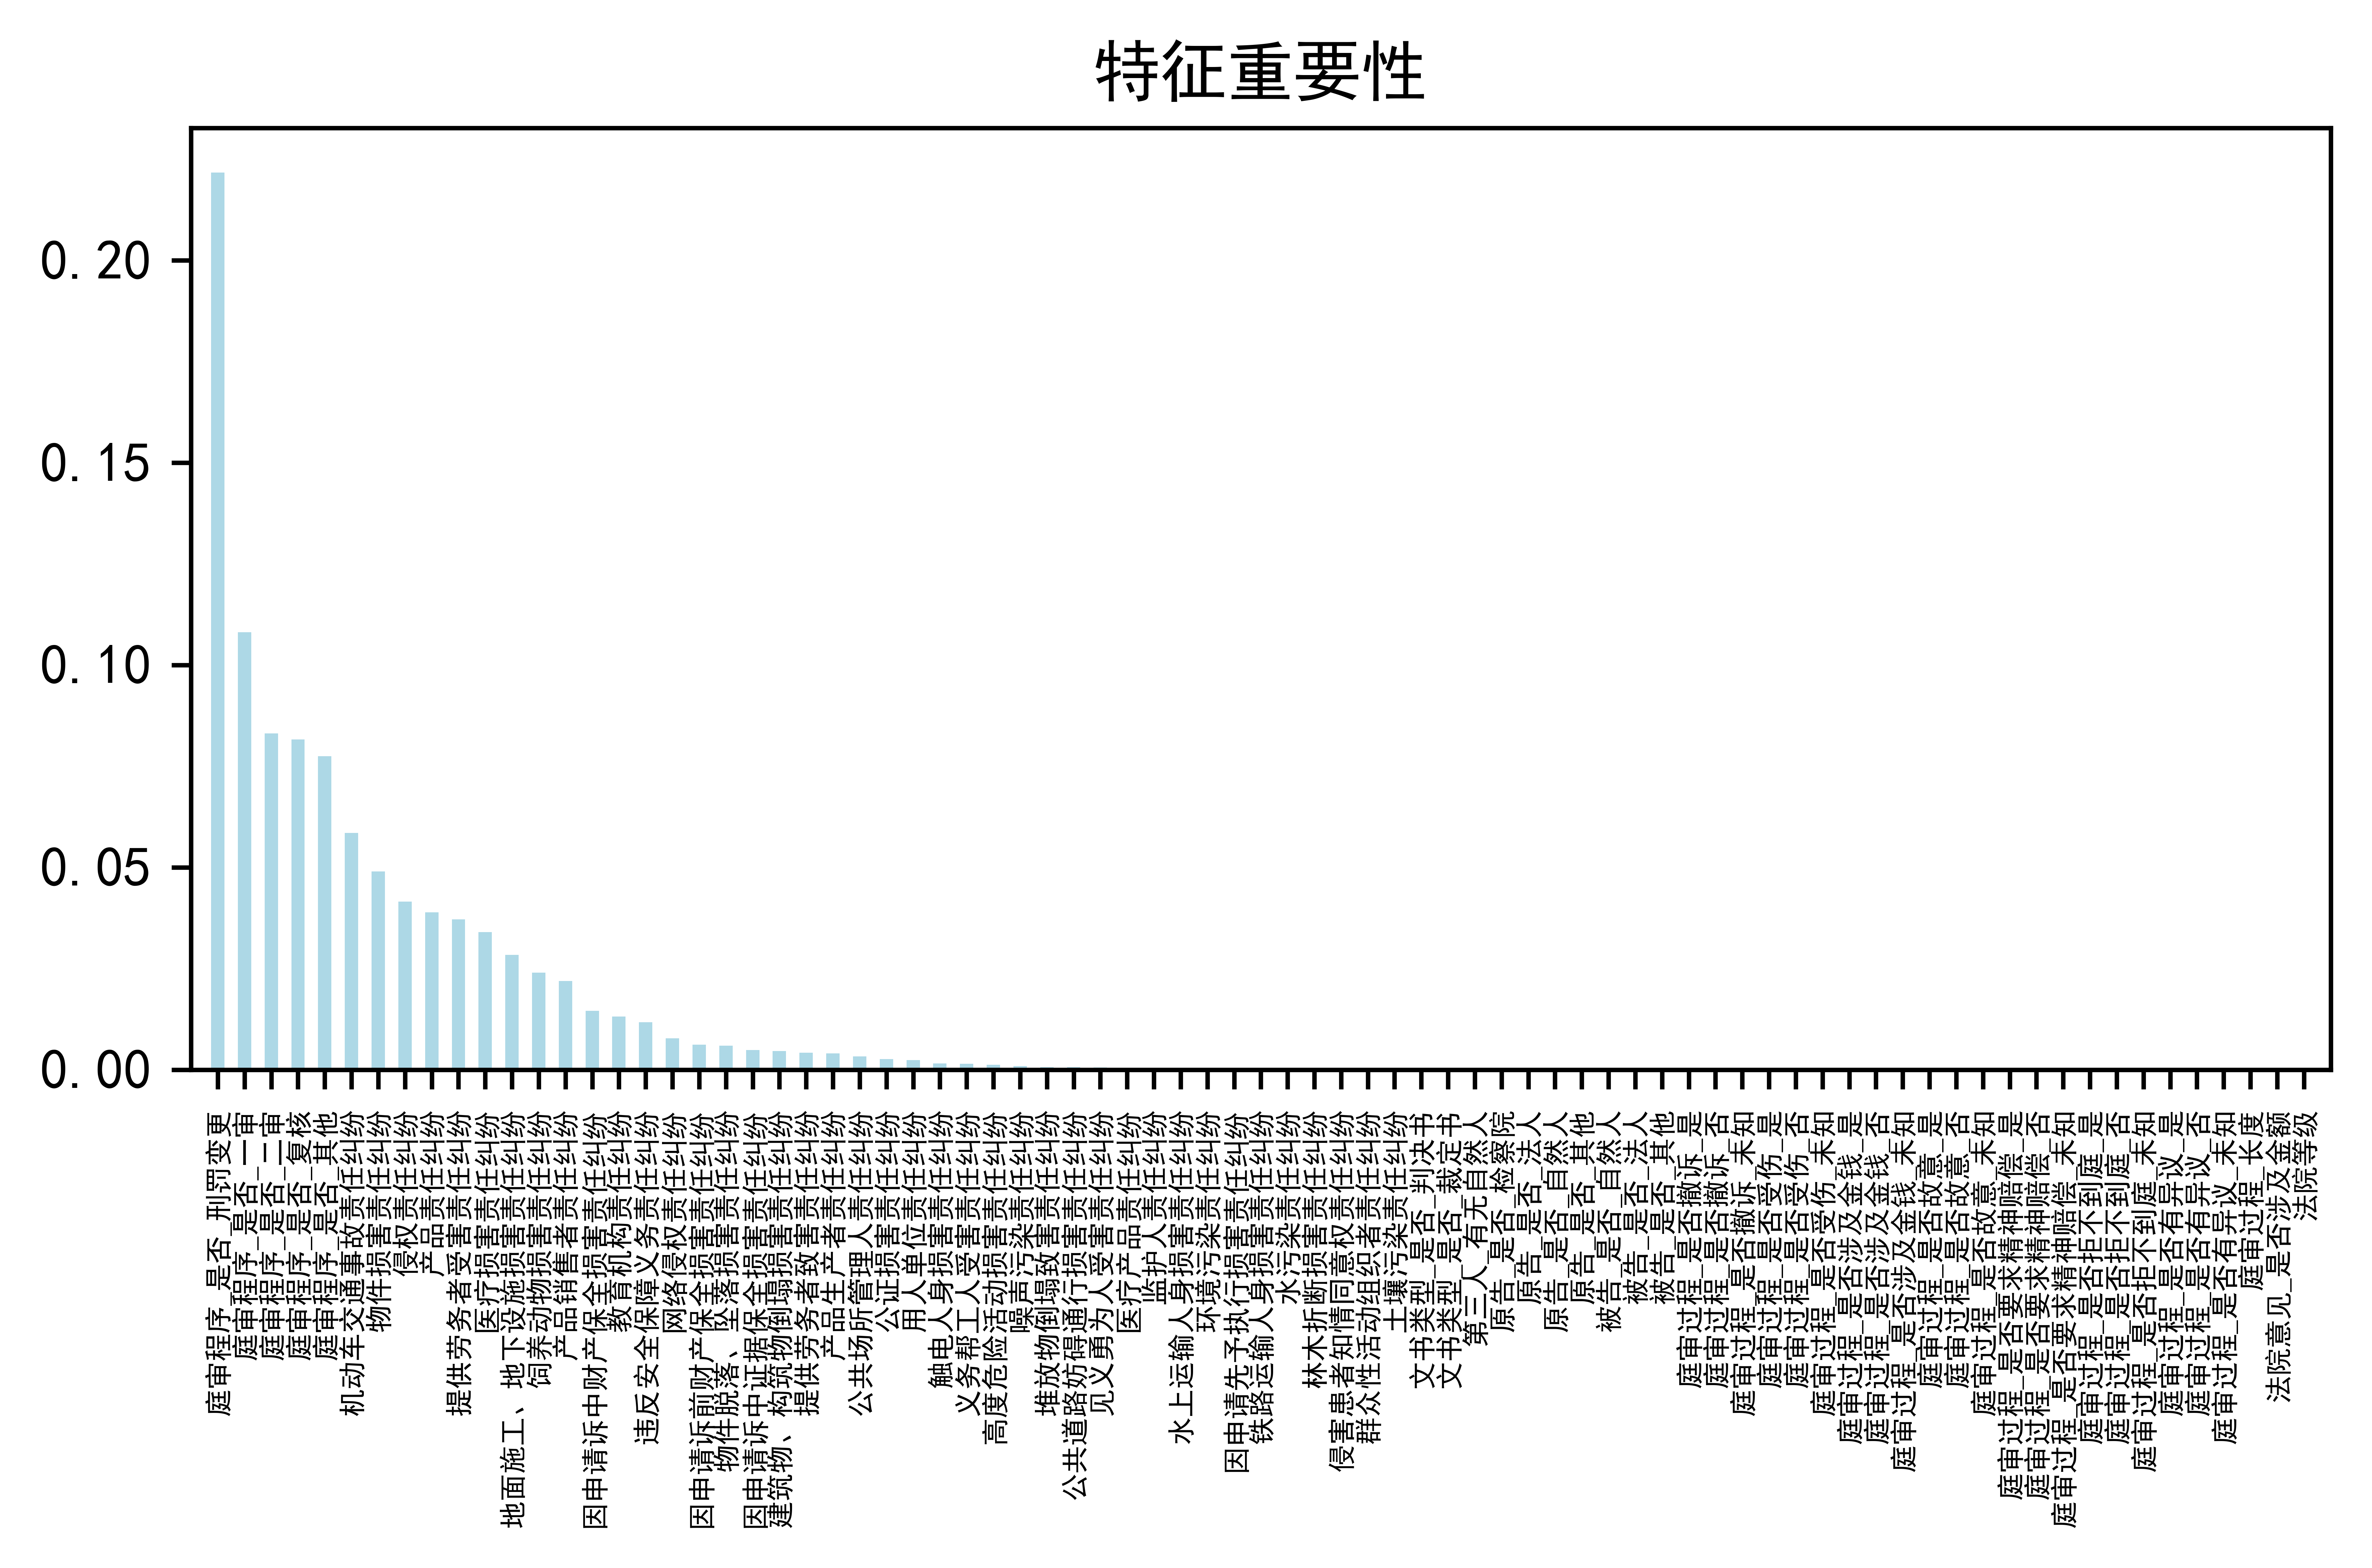

In [72]:
#特征重要性
feat_labels=data.columns[:-1]
importances=clf.feature_importances_
indices=np.argsort(importances)[::-1]

#排序输出特征重要性
for f in range(X_train.shape[1]):
    print ("%2d) %-*s %f" % (f+1,30,feat_labels[f],importances[indices[f]]) )

#作图
plt.figure(dpi=1200)
plt.title(u'特征重要性')
plt.bar(range(X_train.shape[1]),importances[indices],color='lightblue',align='center',width=0.5)
plt.xticks(range(X_train.shape[1]),feat_labels,rotation=90,fontsize=5)
plt.xlim([-1,X_train.shape[1]])
plt.tight_layout()
plt.show()


In [80]:
a = pd.DataFrame(importances)
a.to_excel('重要性.xlsx')
b = pd.DataFrame(data.columns)
b.to_excel('特征.xlsx')